In [1]:
birth.data <- read.csv("./data/daily-total-female-births-CA.csv")
birth.num <- birth.data$births
birth.date <- as.Date(birth.data$date, "%Y-%m-%d")

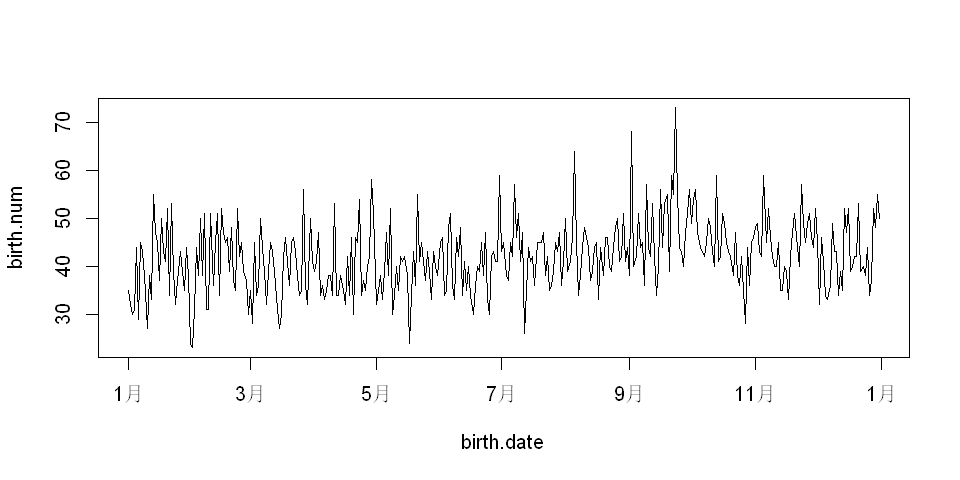

In [2]:
options(repr.plot.width=8, repr.plot.height=4)
plot(birth.num ~ birth.date, type='l')

In [3]:
Box.test(birth.num, lag=log(length(birth.num)))


	Box-Pierce test

data:  birth.num
X-squared = 36.391, df = 5.8999, p-value = 2.088e-06


Reject null hypothesis since p < 0.05. Correlations exists.

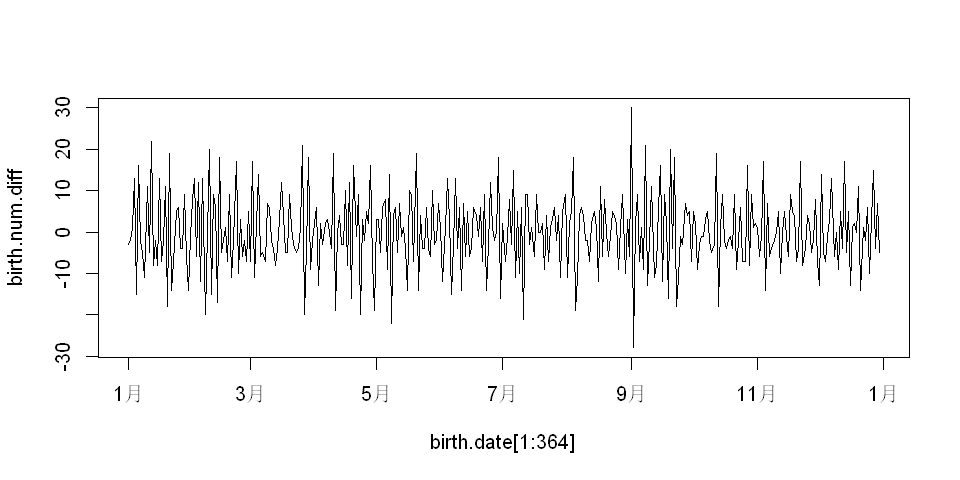

In [4]:
birth.num.diff <- diff(birth.num)

plot(birth.num.diff ~ birth.date[1:364], type='l')

In [5]:
Box.test(birth.num.diff, lag=log(length(birth.num.diff)))


	Box-Pierce test

data:  birth.num.diff
X-squared = 78.094, df = 5.8972, p-value = 7.661e-15


Reject null hypothesis since p < 0.05. Correlations exists.

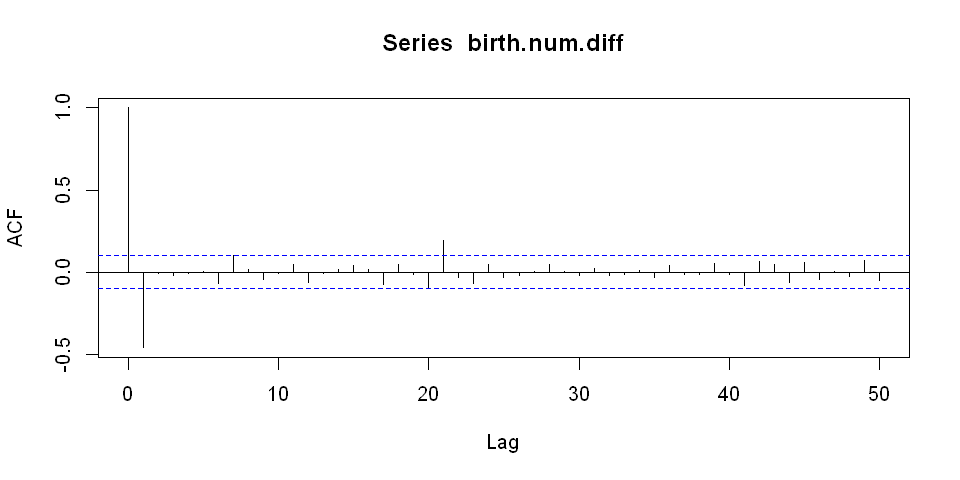

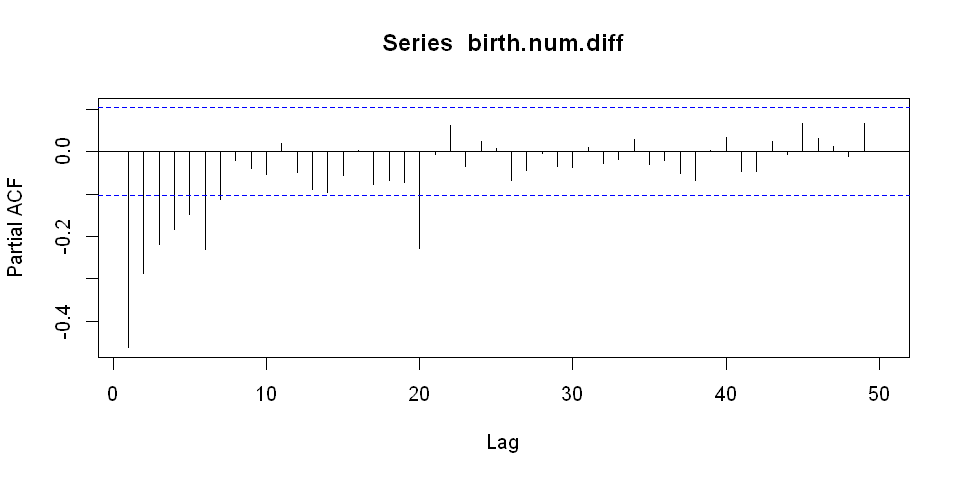

In [6]:
acf(birth.num.diff, 50)
pacf(birth.num.diff, 50)

In [7]:
params <- list(c(0, 1, 1), c(0, 1, 2), c(7, 1, 1), c(7, 1, 2))
results <- data.frame()
for (i in 1:length(params)) {
    param <- params[[i]]
    model <- arima(birth.num, order=param)
    test <- Box.test(model$residuals, lag=log(length(model$residuals)))
    result = data.frame(model=paste("ARIMA(", param[1], ",", param[2], ",", param[3], ")", sep=""), 
                        AIC=model$aic, SSE=sum(resid(model)^2), P.value=test$p.value)
    results <- rbind(results, result)
}

In [8]:
results

model,AIC,SSE,P.value
"ARIMA(0,1,1)",2462.221,18148.46,0.5333604
"ARIMA(0,1,2)",2459.571,17914.65,0.9859227
"ARIMA(7,1,1)",2464.883,17584.39,0.9999899
"ARIMA(7,1,2)",2466.666,17574.06,0.9999929


Select ARIMA(0,1,2) with minimum AIC value.

initial  value 2.216721 
iter   2 value 2.047518
iter   3 value 1.974780
iter   4 value 1.966955
iter   5 value 1.958906
iter   6 value 1.952299
iter   7 value 1.951439
iter   8 value 1.950801
iter   9 value 1.950797
iter  10 value 1.950650
iter  11 value 1.950646
iter  12 value 1.950638
iter  13 value 1.950635
iter  13 value 1.950635
iter  13 value 1.950635
final  value 1.950635 
converged
initial  value 1.950708 
iter   2 value 1.950564
iter   3 value 1.950290
iter   4 value 1.950196
iter   5 value 1.950185
iter   6 value 1.950185
iter   7 value 1.950185
iter   7 value 1.950185
iter   7 value 1.950185
final  value 1.950185 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), xreg = constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
          ma1      ma2  constant
      -0.8511  -0.1113     0.015
s.e.   0.0496   0.0502     0.015

sigma^2 estimated as 49.08:  log likelihood = -1226.36,  aic = 2460.72

$degrees_of_freedom
[1] 361

$ttable
         Estimate     SE  t.value p.value
ma1       -0.8511 0.0496 -17.1448  0.0000
ma2       -0.1113 0.0502  -2.2164  0.0273
constant   0.0150 0.0150   1.0007  0.3176

$AIC
[1] 6.760225

$AICc
[1] 6.760408

$BIC
[1] 6.803051


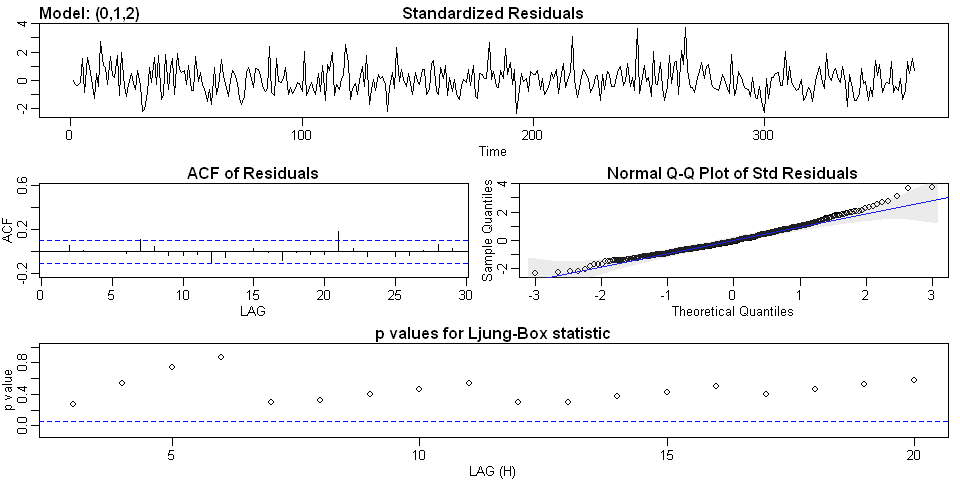

In [9]:
library(astsa)

sarima(birth.num, 0, 1, 2, 0, 0, 0)

Final model:

$$ (1 - B)X_t = 0.015 + e_t - 0.8511 e_{t-1} - 0.1113 e_{t-2}$$

$$ X_t = X_{t-1} + 0.015 + e_t - 0.8511 e_{t-1} - 0.1113 e_{t-2}$$